## This is analysis of RCF data using FSL randomise


In [1]:
import numpy as np
from  nipype.interfaces import fsl
import nipype.pipeline.engine as pe  # pypeline engine
import os
from nilearn.plotting import plot_glass_brain
from nilearn.plotting import plot_stat_map
import nilearn.plotting
import glob
import nibabel as nib

['/media/Data/RCF_output/fmriprep/sub-038/ses-1/func/sub-038_ses-1_task-task509a_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-038/ses-1/func/sub-038_ses-1_task-task509_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-1221/ses-1/func/sub-1221_ses-1_task-task505_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-035/ses-1/func/sub-035_ses-1_task-task556_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-1271/ses-1/func/sub-1271_ses-1_task-task505_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-1373/ses-1/func/sub-1373_ses-1_task-task505_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-1340/ses-1/func/sub-1340_ses-1_task-task505_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz', '/media/Data/RCF_output/fmriprep/sub-1389/ses-1/func/sub-1389_ses-1_task-task505

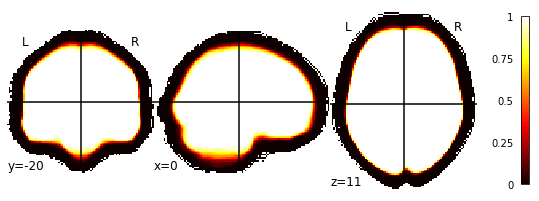

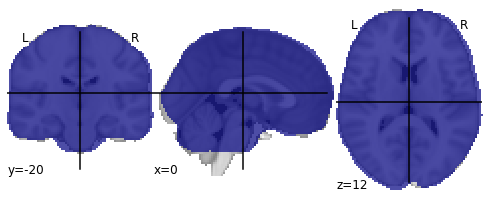

In [2]:
# build group brain mask

brainmasks = glob.glob('/media/Data/RCF_output/fmriprep/sub-*/ses-1/func/sub-*_ses-1_task-task*_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz')
print(brainmasks)
%matplotlib inline
#for mask in brainmasks:
 #   nilearn.plotting.plot_roi(mask)
    
mean_mask = nilearn.image.mean_img(brainmasks)
nilearn.plotting.plot_stat_map(mean_mask)
group_mask = nilearn.image.math_img("a>=0.95", a=mean_mask)
nilearn.plotting.plot_roi(group_mask)

In [2]:
# take either cope (fsl) or cons (spm)
copes = glob.glob('/media/Data/work/RCF_or/fsl_fit/_subject_id_*/modelestimate/mapflow/_modelestimate0/results/cope8.nii.gz')
len(copes)

59

In [2]:
contrast_name = 'cont8'

In [4]:
contrast_name = 'cont8'
copes_concat = nilearn.image.concat_imgs(copes, auto_resample=True)
copes_concat.to_filename("/media/Data/work/RCF_or/fslRandomize/%s.nii.gz" %(contrast_name))

group_mask = nilearn.image.resample_to_img(group_mask, copes_concat, interpolation='nearest')
group_mask.to_filename(os.path.join("/media/Data/work/RCF_or/fslRandomize",  "group_mask.nii.gz"))

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is 

/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is different across subjects.'
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/nilearn/_utils/niimg_conversions.py:135: UserWarning: Affine is different across subjects. Realignement on first subject affine forced
  warnings.warn('Affine is 

In [3]:
randomize = pe.Node(interface = fsl.Randomise(), base_dir = '/media/Data/work/RCF_or/fslRandomize',
                    name = 'randomize_%s' %(contrast_name))
randomize.inputs.in_file = '/media/Data/work/RCF_or/fslRandomize/%s.nii.gz' %(contrast_name) # choose which file to run permutation test on
randomize.inputs.mask = '/media/Data/work/RCF_or/fslRandomize/group_mask.nii.gz' # group mask file (was created earlier)
randomize.inputs.one_sample_group_mean = True
randomize.inputs.tfce = True
randomize.inputs.vox_p_values = True
randomize.inputs.num_perm = 1000
#randomize.inputs.var_smooth = 5

randomize.run()

200426-15:23:25,776 nipype.workflow INFO:
	 [Node] Setting-up "randomize_cont8" in "/media/Data/work/RCF_or/fslRandomize/randomize_cont8".
200426-15:23:25,823 nipype.workflow INFO:
	 [Node] Running "randomize_cont8" ("nipype.interfaces.fsl.model.Randomise"), a CommandLine Interface with command:
randomise -i /media/Data/work/RCF_or/fslRandomize/cont8.nii.gz -o "randomise" -m /media/Data/work/RCF_or/fslRandomize/group_mask.nii.gz -n 1000 -1 -T -x
200426-15:23:25,878 nipype.interface INFO:
	 stdout 2020-04-26T15:23:25.878434:randomise options: -i /media/Data/work/RCF_or/fslRandomize/cont8.nii.gz -o randomise -m /media/Data/work/RCF_or/fslRandomize/group_mask.nii.gz -n 1000 -1 -T -x 
200426-15:23:28,359 nipype.interface INFO:
	 stdout 2020-04-26T15:23:28.359634:Loading Data: 
200426-15:23:28,360 nipype.interface INFO:
	 stdout 2020-04-26T15:23:28.359634:Data loaded
200426-15:23:28,419 nipype.interface INFO:
	 stdout 2020-04-26T15:23:28.419849:One-sample design detected; sign-flipping inst

200426-15:23:52,585 nipype.interface INFO:
	 stdout 2020-04-26T15:23:52.585252:Starting permutation 69
200426-15:23:52,901 nipype.interface INFO:
	 stdout 2020-04-26T15:23:52.901714:Starting permutation 70
200426-15:23:53,288 nipype.interface INFO:
	 stdout 2020-04-26T15:23:53.288107:Starting permutation 71
200426-15:23:53,629 nipype.interface INFO:
	 stdout 2020-04-26T15:23:53.629176:Starting permutation 72
200426-15:23:53,985 nipype.interface INFO:
	 stdout 2020-04-26T15:23:53.985044:Starting permutation 73
200426-15:23:54,265 nipype.interface INFO:
	 stdout 2020-04-26T15:23:54.265058:Starting permutation 74
200426-15:23:54,592 nipype.interface INFO:
	 stdout 2020-04-26T15:23:54.592173:Starting permutation 75
200426-15:23:54,870 nipype.interface INFO:
	 stdout 2020-04-26T15:23:54.870460:Starting permutation 76
200426-15:23:55,145 nipype.interface INFO:
	 stdout 2020-04-26T15:23:55.145407:Starting permutation 77
200426-15:23:55,431 nipype.interface INFO:
	 stdout 2020-04-26T15:23:55.4

200426-15:24:20,715 nipype.interface INFO:
	 stdout 2020-04-26T15:24:20.714991:Starting permutation 149
200426-15:24:21,90 nipype.interface INFO:
	 stdout 2020-04-26T15:24:21.090714:Starting permutation 150
200426-15:24:21,593 nipype.interface INFO:
	 stdout 2020-04-26T15:24:21.592949:Starting permutation 151
200426-15:24:21,961 nipype.interface INFO:
	 stdout 2020-04-26T15:24:21.961496:Starting permutation 152
200426-15:24:22,306 nipype.interface INFO:
	 stdout 2020-04-26T15:24:22.306415:Starting permutation 153
200426-15:24:22,666 nipype.interface INFO:
	 stdout 2020-04-26T15:24:22.666231:Starting permutation 154
200426-15:24:23,32 nipype.interface INFO:
	 stdout 2020-04-26T15:24:23.032101:Starting permutation 155
200426-15:24:23,380 nipype.interface INFO:
	 stdout 2020-04-26T15:24:23.380360:Starting permutation 156
200426-15:24:23,766 nipype.interface INFO:
	 stdout 2020-04-26T15:24:23.766864:Starting permutation 157
200426-15:24:24,94 nipype.interface INFO:
	 stdout 2020-04-26T15:2

200426-15:24:48,600 nipype.interface INFO:
	 stdout 2020-04-26T15:24:48.600792:Starting permutation 228
200426-15:24:48,932 nipype.interface INFO:
	 stdout 2020-04-26T15:24:48.932332:Starting permutation 229
200426-15:24:49,196 nipype.interface INFO:
	 stdout 2020-04-26T15:24:49.196734:Starting permutation 230
200426-15:24:49,502 nipype.interface INFO:
	 stdout 2020-04-26T15:24:49.502215:Starting permutation 231
200426-15:24:49,950 nipype.interface INFO:
	 stdout 2020-04-26T15:24:49.950540:Starting permutation 232
200426-15:24:50,346 nipype.interface INFO:
	 stdout 2020-04-26T15:24:50.346880:Starting permutation 233
200426-15:24:50,618 nipype.interface INFO:
	 stdout 2020-04-26T15:24:50.618048:Starting permutation 234
200426-15:24:50,873 nipype.interface INFO:
	 stdout 2020-04-26T15:24:50.873086:Starting permutation 235
200426-15:24:51,219 nipype.interface INFO:
	 stdout 2020-04-26T15:24:51.219701:Starting permutation 236
200426-15:24:51,526 nipype.interface INFO:
	 stdout 2020-04-26T1

200426-15:25:15,851 nipype.interface INFO:
	 stdout 2020-04-26T15:25:15.851226:Starting permutation 307
200426-15:25:16,213 nipype.interface INFO:
	 stdout 2020-04-26T15:25:16.213603:Starting permutation 308
200426-15:25:16,609 nipype.interface INFO:
	 stdout 2020-04-26T15:25:16.609461:Starting permutation 309
200426-15:25:17,25 nipype.interface INFO:
	 stdout 2020-04-26T15:25:17.025642:Starting permutation 310
200426-15:25:17,447 nipype.interface INFO:
	 stdout 2020-04-26T15:25:17.446939:Starting permutation 311
200426-15:25:17,756 nipype.interface INFO:
	 stdout 2020-04-26T15:25:17.756135:Starting permutation 312
200426-15:25:18,57 nipype.interface INFO:
	 stdout 2020-04-26T15:25:18.057582:Starting permutation 313
200426-15:25:18,349 nipype.interface INFO:
	 stdout 2020-04-26T15:25:18.349264:Starting permutation 314
200426-15:25:18,709 nipype.interface INFO:
	 stdout 2020-04-26T15:25:18.709376:Starting permutation 315
200426-15:25:19,136 nipype.interface INFO:
	 stdout 2020-04-26T15:

200426-15:25:44,538 nipype.interface INFO:
	 stdout 2020-04-26T15:25:44.538142:Starting permutation 386
200426-15:25:44,856 nipype.interface INFO:
	 stdout 2020-04-26T15:25:44.855979:Starting permutation 387
200426-15:25:45,227 nipype.interface INFO:
	 stdout 2020-04-26T15:25:45.227718:Starting permutation 388
200426-15:25:45,643 nipype.interface INFO:
	 stdout 2020-04-26T15:25:45.643474:Starting permutation 389
200426-15:25:46,140 nipype.interface INFO:
	 stdout 2020-04-26T15:25:46.140416:Starting permutation 390
200426-15:25:46,445 nipype.interface INFO:
	 stdout 2020-04-26T15:25:46.445809:Starting permutation 391
200426-15:25:46,844 nipype.interface INFO:
	 stdout 2020-04-26T15:25:46.844207:Starting permutation 392
200426-15:25:47,277 nipype.interface INFO:
	 stdout 2020-04-26T15:25:47.277615:Starting permutation 393
200426-15:25:47,590 nipype.interface INFO:
	 stdout 2020-04-26T15:25:47.590035:Starting permutation 394
200426-15:25:47,985 nipype.interface INFO:
	 stdout 2020-04-26T1

200426-15:26:12,815 nipype.interface INFO:
	 stdout 2020-04-26T15:26:12.815795:Starting permutation 465
200426-15:26:13,97 nipype.interface INFO:
	 stdout 2020-04-26T15:26:13.097233:Starting permutation 466
200426-15:26:13,411 nipype.interface INFO:
	 stdout 2020-04-26T15:26:13.411577:Starting permutation 467
200426-15:26:13,703 nipype.interface INFO:
	 stdout 2020-04-26T15:26:13.703159:Starting permutation 468
200426-15:26:14,131 nipype.interface INFO:
	 stdout 2020-04-26T15:26:14.131816:Starting permutation 469
200426-15:26:14,496 nipype.interface INFO:
	 stdout 2020-04-26T15:26:14.496843:Starting permutation 470
200426-15:26:14,838 nipype.interface INFO:
	 stdout 2020-04-26T15:26:14.838065:Starting permutation 471
200426-15:26:15,147 nipype.interface INFO:
	 stdout 2020-04-26T15:26:15.147646:Starting permutation 472
200426-15:26:15,413 nipype.interface INFO:
	 stdout 2020-04-26T15:26:15.412925:Starting permutation 473
200426-15:26:15,765 nipype.interface INFO:
	 stdout 2020-04-26T15

200426-15:26:40,612 nipype.interface INFO:
	 stdout 2020-04-26T15:26:40.612470:Starting permutation 544
200426-15:26:40,901 nipype.interface INFO:
	 stdout 2020-04-26T15:26:40.901916:Starting permutation 545
200426-15:26:41,236 nipype.interface INFO:
	 stdout 2020-04-26T15:26:41.236432:Starting permutation 546
200426-15:26:41,595 nipype.interface INFO:
	 stdout 2020-04-26T15:26:41.595203:Starting permutation 547
200426-15:26:41,845 nipype.interface INFO:
	 stdout 2020-04-26T15:26:41.845440:Starting permutation 548
200426-15:26:42,154 nipype.interface INFO:
	 stdout 2020-04-26T15:26:42.153920:Starting permutation 549
200426-15:26:42,578 nipype.interface INFO:
	 stdout 2020-04-26T15:26:42.577920:Starting permutation 550
200426-15:26:42,847 nipype.interface INFO:
	 stdout 2020-04-26T15:26:42.847550:Starting permutation 551
200426-15:26:43,199 nipype.interface INFO:
	 stdout 2020-04-26T15:26:43.199374:Starting permutation 552
200426-15:26:43,471 nipype.interface INFO:
	 stdout 2020-04-26T1

200426-15:27:09,58 nipype.interface INFO:
	 stdout 2020-04-26T15:27:09.058081:Starting permutation 623
200426-15:27:09,400 nipype.interface INFO:
	 stdout 2020-04-26T15:27:09.400117:Starting permutation 624
200426-15:27:09,699 nipype.interface INFO:
	 stdout 2020-04-26T15:27:09.699250:Starting permutation 625
200426-15:27:10,10 nipype.interface INFO:
	 stdout 2020-04-26T15:27:10.010638:Starting permutation 626
200426-15:27:10,336 nipype.interface INFO:
	 stdout 2020-04-26T15:27:10.336400:Starting permutation 627
200426-15:27:10,641 nipype.interface INFO:
	 stdout 2020-04-26T15:27:10.641300:Starting permutation 628
200426-15:27:10,998 nipype.interface INFO:
	 stdout 2020-04-26T15:27:10.998769:Starting permutation 629
200426-15:27:11,297 nipype.interface INFO:
	 stdout 2020-04-26T15:27:11.296949:Starting permutation 630
200426-15:27:11,599 nipype.interface INFO:
	 stdout 2020-04-26T15:27:11.599811:Starting permutation 631
200426-15:27:11,895 nipype.interface INFO:
	 stdout 2020-04-26T15:

200426-15:27:36,578 nipype.interface INFO:
	 stdout 2020-04-26T15:27:36.578117:Starting permutation 702
200426-15:27:36,858 nipype.interface INFO:
	 stdout 2020-04-26T15:27:36.858643:Starting permutation 703
200426-15:27:37,387 nipype.interface INFO:
	 stdout 2020-04-26T15:27:37.387584:Starting permutation 704
200426-15:27:37,689 nipype.interface INFO:
	 stdout 2020-04-26T15:27:37.689254:Starting permutation 705
200426-15:27:38,10 nipype.interface INFO:
	 stdout 2020-04-26T15:27:38.010551:Starting permutation 706
200426-15:27:38,338 nipype.interface INFO:
	 stdout 2020-04-26T15:27:38.338094:Starting permutation 707
200426-15:27:38,697 nipype.interface INFO:
	 stdout 2020-04-26T15:27:38.697150:Starting permutation 708
200426-15:27:38,995 nipype.interface INFO:
	 stdout 2020-04-26T15:27:38.995314:Starting permutation 709
200426-15:27:39,353 nipype.interface INFO:
	 stdout 2020-04-26T15:27:39.353389:Starting permutation 710
200426-15:27:39,709 nipype.interface INFO:
	 stdout 2020-04-26T15

200426-15:28:04,656 nipype.interface INFO:
	 stdout 2020-04-26T15:28:04.656837:Starting permutation 781
200426-15:28:05,5 nipype.interface INFO:
	 stdout 2020-04-26T15:28:05.005864:Starting permutation 782
200426-15:28:05,415 nipype.interface INFO:
	 stdout 2020-04-26T15:28:05.415345:Starting permutation 783
200426-15:28:05,792 nipype.interface INFO:
	 stdout 2020-04-26T15:28:05.792599:Starting permutation 784
200426-15:28:06,247 nipype.interface INFO:
	 stdout 2020-04-26T15:28:06.247615:Starting permutation 785
200426-15:28:06,537 nipype.interface INFO:
	 stdout 2020-04-26T15:28:06.537743:Starting permutation 786
200426-15:28:06,892 nipype.interface INFO:
	 stdout 2020-04-26T15:28:06.892749:Starting permutation 787
200426-15:28:07,147 nipype.interface INFO:
	 stdout 2020-04-26T15:28:07.147340:Starting permutation 788
200426-15:28:07,446 nipype.interface INFO:
	 stdout 2020-04-26T15:28:07.446025:Starting permutation 789
200426-15:28:07,798 nipype.interface INFO:
	 stdout 2020-04-26T15:

200426-15:28:33,255 nipype.interface INFO:
	 stdout 2020-04-26T15:28:33.255456:Starting permutation 860
200426-15:28:33,639 nipype.interface INFO:
	 stdout 2020-04-26T15:28:33.639841:Starting permutation 861
200426-15:28:34,153 nipype.interface INFO:
	 stdout 2020-04-26T15:28:34.152949:Starting permutation 862
200426-15:28:34,446 nipype.interface INFO:
	 stdout 2020-04-26T15:28:34.446708:Starting permutation 863
200426-15:28:34,801 nipype.interface INFO:
	 stdout 2020-04-26T15:28:34.801586:Starting permutation 864
200426-15:28:35,293 nipype.interface INFO:
	 stdout 2020-04-26T15:28:35.293749:Starting permutation 865
200426-15:28:35,715 nipype.interface INFO:
	 stdout 2020-04-26T15:28:35.715271:Starting permutation 866
200426-15:28:35,992 nipype.interface INFO:
	 stdout 2020-04-26T15:28:35.992276:Starting permutation 867
200426-15:28:36,307 nipype.interface INFO:
	 stdout 2020-04-26T15:28:36.307022:Starting permutation 868
200426-15:28:36,576 nipype.interface INFO:
	 stdout 2020-04-26T1

200426-15:29:00,603 nipype.interface INFO:
	 stdout 2020-04-26T15:29:00.603408:Starting permutation 939
200426-15:29:00,969 nipype.interface INFO:
	 stdout 2020-04-26T15:29:00.969151:Starting permutation 940
200426-15:29:01,332 nipype.interface INFO:
	 stdout 2020-04-26T15:29:01.332242:Starting permutation 941
200426-15:29:01,579 nipype.interface INFO:
	 stdout 2020-04-26T15:29:01.579214:Starting permutation 942
200426-15:29:01,964 nipype.interface INFO:
	 stdout 2020-04-26T15:29:01.964049:Starting permutation 943
200426-15:29:02,275 nipype.interface INFO:
	 stdout 2020-04-26T15:29:02.275831:Starting permutation 944
200426-15:29:02,557 nipype.interface INFO:
	 stdout 2020-04-26T15:29:02.557414:Starting permutation 945
200426-15:29:02,896 nipype.interface INFO:
	 stdout 2020-04-26T15:29:02.896528:Starting permutation 946
200426-15:29:03,296 nipype.interface INFO:
	 stdout 2020-04-26T15:29:03.296101:Starting permutation 947
200426-15:29:03,677 nipype.interface INFO:
	 stdout 2020-04-26T1

In [4]:
# load files
tsat = '/media/Data/work/RCF_or/2nd_level/_cope_8/randomize/randomise_tstat1.nii.gz'
p_stat = '/media/Data/work/RCF_or/2nd_level/_cope_8/randomize/randomise_tfce_corrp_tstat1.nii.gz'


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """
/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


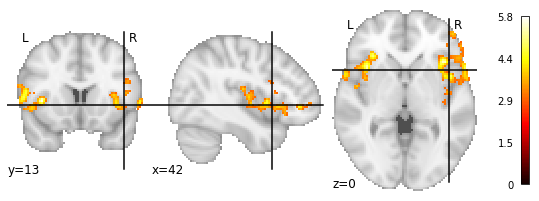

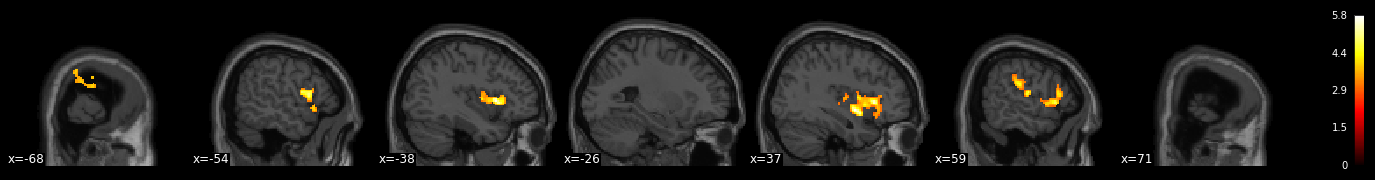

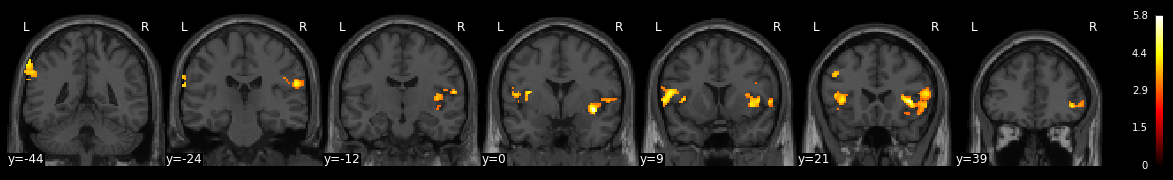

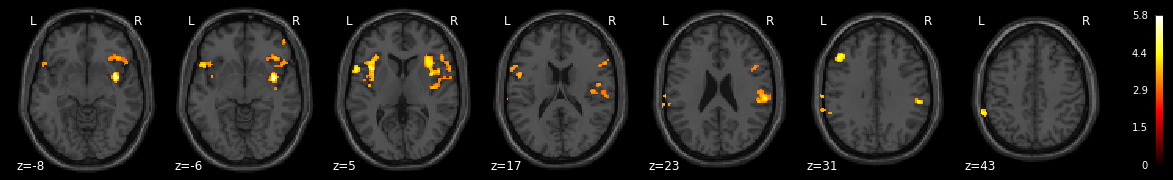

In [5]:
# visualize results
thr = 0.975
t_plot = nib.load(tsat)
p = nib.load(p_stat)
t_plot_data = t_plot.get_data()
p_data = p.get_data()

# threshold raw t map by p values
p_mask = p_data < thr
t_plot_data[p_mask] = 0

anat_mean = '/home/or/Downloads/spm12/canonical/single_subj_T1.nii' # canonical from SPM
%matplotlib inline
plot_stat_map(t_plot)#,
                     # bg_img = anat_mean)

plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="x", 
                       colorbar=True)
plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="y",
                       colorbar=True)
plot_stat_map(t_plot,
                      bg_img = anat_mean,
                       display_mode="z",
                       colorbar=True)

In [ ]:
## look at snd level regular one

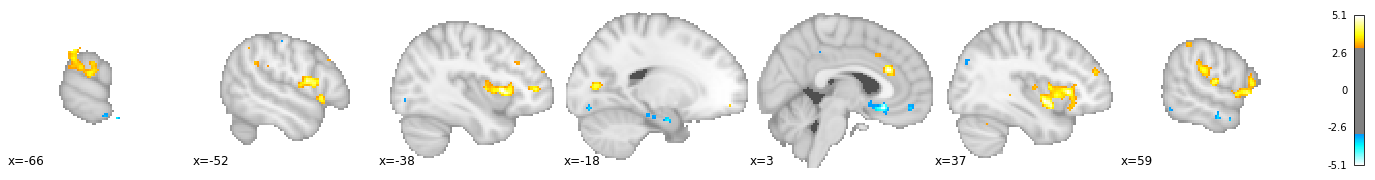

In [40]:
img_p = '/media/Data/work/RCF_or/2nd_level/_cope_8/fdr_ztop/zstat1_pval.nii.gz'
img = '/media/Data/work/RCF_or/2nd_level/_cope_8/flameo_ols/stats/zstat1.nii.gz'
plot_stat_map(img, threshold=3, display_mode='x')

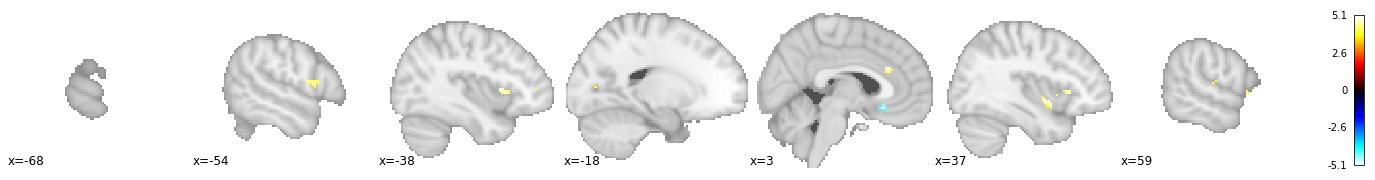

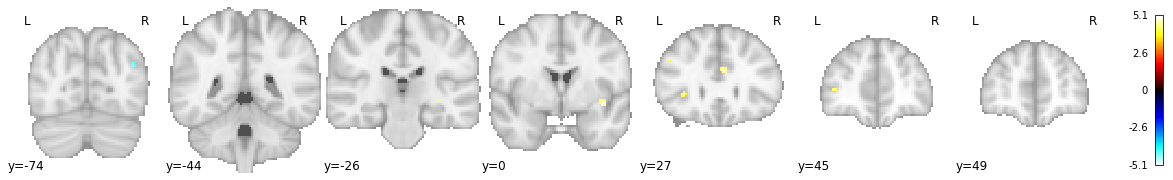

In [36]:
# FWE corrected (p0.025 as it is two sided)
plot_stat_map('/media/Data/work/RCF_or/2nd_level/_cope_8/fwe_thresh/zstat1_maths.nii.gz', display_mode='x')
plot_stat_map('/media/Data/work/RCF_or/2nd_level/_cope_8/fwe_thresh/zstat1_maths.nii.gz', display_mode='y')

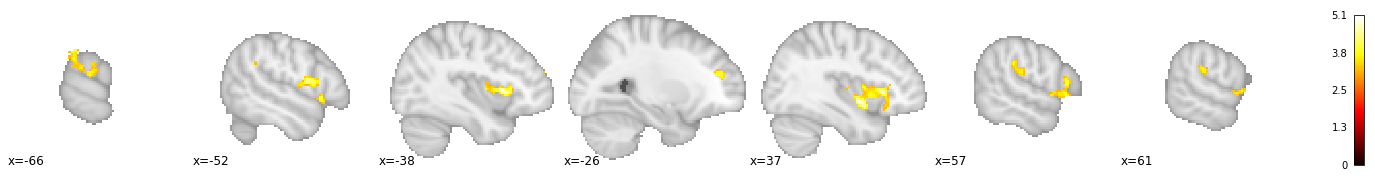

In [33]:
## cluster based correction
plot_stat_map('/media/Data/work/RCF_or/2nd_level/_cope_8/cluster_all/zstat1_threshold_maths.nii.gz',
              display_mode= 'x')

## To test deactivation of region - we first need to multiply the image by -1 and then run randomise again, on the negative image file.

In [ ]:

# negatative image:
# first - take the merged cope
cope_num = '8'
data_dir = '/media/Data/work/RCF_or/2nd_level'
# where is the merged (positive) cope (or con if used in SPM)
merged_cope = '/media/Data/work/RCF_or/2nd_level/_cope_8/copemerge/cope8_merged.nii.gz'


from nipype.interfaces.fsl.maths import BinaryMaths
maths = BinaryMaths()
maths.inputs.in_file = merged_cope
maths.inputs.operand_value = -1
maths.inputs.operation = 'mul'
maths.inputs.out_file = data_dir + '/negative_cope' + cope_num + '.nii.gz'
maths.run()

# now we can run randomise with this one

In [ ]:
from  nipype.interfaces import fsl
import nipype.pipeline.engine as pe  # pypeline engine
randomize = pe.Node(interface = fsl.Randomise(), base_dir = '/media/Data/work/RCF_or/fslRandomize',
                    name = 'randomize_%s' %(cope_num))
randomize.inputs.in_file = maths.inputs.out_file
randomize.inputs.mask = '/media/Data/work/RCF_or/fslRandomize/group_mask.nii.gz' # group mask file (was created earlier)
randomize.inputs.one_sample_group_mean = True
randomize.inputs.tfce = True
randomize.inputs.vox_p_values = True
randomize.inputs.num_perm = 3000
#randomize.inputs.var_smooth = 5

randomize.run()